In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel, ttest_ind

1. Analisis Eksplorasi Dasar

a. Fungsi Dasar

In [3]:
#Membaca Dataset
df = pd.read_csv('cust_seg.csv')

In [4]:
#Menampilkan Dataset
df.head()

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
0,70,0,4,1,1,1,57,52,49.2,57.2
1,121,1,4,2,1,3,68,59,63.6,64.9
2,86,0,4,3,1,1,44,33,64.8,36.3
3,141,0,4,3,1,3,63,44,56.4,48.4
4,172,0,4,2,1,2,47,52,68.4,57.2


In [5]:
#Melihat tipe data tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   custid               200 non-null    int64  
 1   sex                  200 non-null    int64  
 2   AqChannel            200 non-null    int64  
 3   region               200 non-null    int64  
 4   Marital_status       200 non-null    int64  
 5   segment              200 non-null    int64  
 6   pre_usage            200 non-null    int64  
 7   Post_usage_1month    200 non-null    int64  
 8   Latest_mon_usage     200 non-null    float64
 9   post_usage_2ndmonth  200 non-null    float64
dtypes: float64(2), int64(8)
memory usage: 15.8 KB


In [7]:
#Mengecek apakah ada data yang kosong
df.isna().sum()

custid                 0
sex                    0
AqChannel              0
region                 0
Marital_status         0
segment                0
pre_usage              0
Post_usage_1month      0
Latest_mon_usage       0
post_usage_2ndmonth    0
dtype: int64

In [8]:
#Mengecek ukuran data
df.shape

(200, 10)

In [9]:
#Mengecek data duplikat
df[df.duplicated()].shape

(0, 10)

In [6]:
#Melihat deskriptif data
df.describe()

,custid,sex,AqChannel,region,Marital_status,segment,pre_usage,Post_usage_1month,Latest_mon_usage,post_usage_2ndmonth
count,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,0.54500,3.430000,2.055000,1.160000,2.025000,52.230000,52.775000,63.174000,58.052500
std,57.879185,0.49922,1.039472,0.724291,0.367526,0.690477,10.252937,9.478586,11.242137,10.426445
min,1.000000,0.00000,1.000000,1.000000,1.000000,1.000000,28.000000,31.000000,39.600000,34.100000
25%,50.750000,0.00000,3.000000,2.000000,1.000000,2.000000,44.000000,45.750000,54.000000,50.325000
50%,100.500000,1.00000,4.000000,2.000000,1.000000,2.000000,50.000000,54.000000,62.400000,59.400000
75%,150.250000,1.00000,4.000000,3.000000,1.000000,2.250000,60.000000,60.000000,70.800000,66.000000
max,200.000000,1.00000,4.000000,3.000000,2.000000,3.000000,76.000000,67.000000,90.000000,73.700000


In [10]:
#Melihat nama-nama kolom
df.columns

Index(['custid', 'sex', 'AqChannel', 'region', 'Marital_status', 'segment',
       'pre_usage', 'Post_usage_1month', 'Latest_mon_usage',
       'post_usage_2ndmonth'],
      dtype='object')

b. Histogram

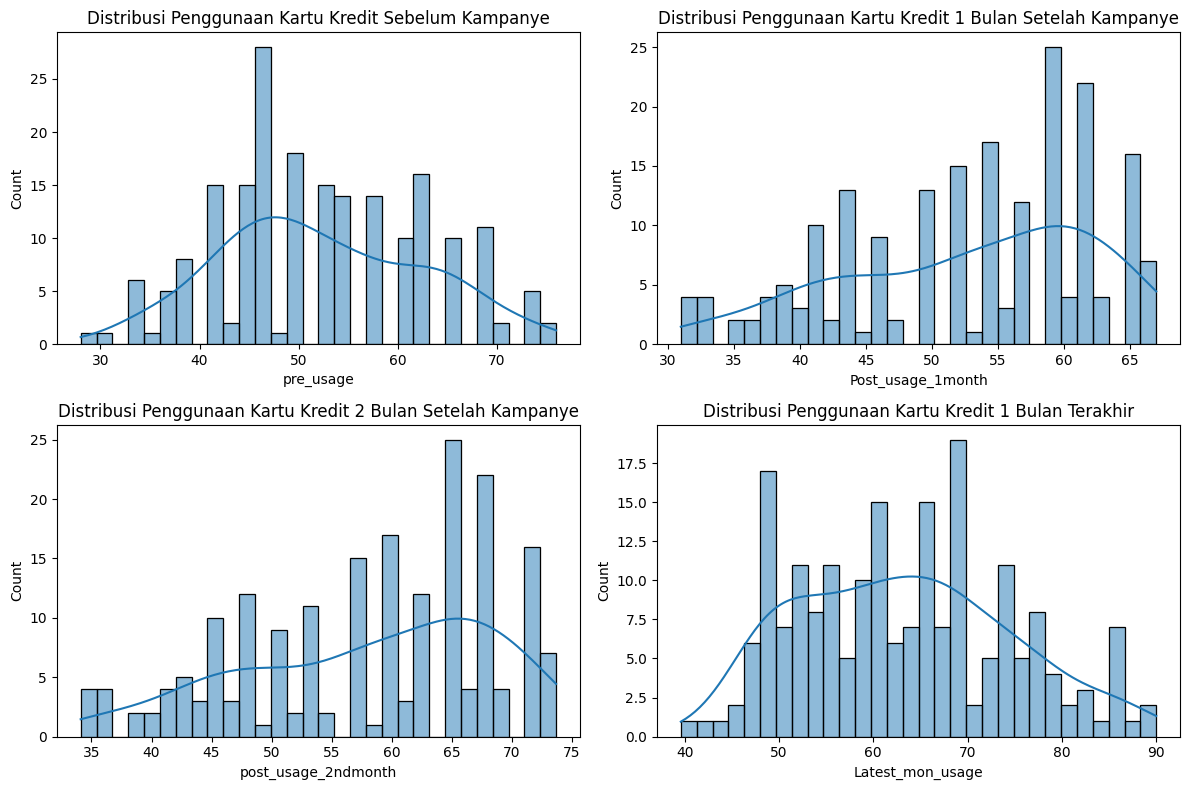

In [18]:
#Membuat histogram
plt.figure(figsize=(12, 8))

# Histogram untuk penggunaan kartu kredit sebelum kampanye
plt.subplot(2, 2, 1)
sns.histplot(df['pre_usage'], bins=30, kde=True)
plt.title('Distribusi Penggunaan Kartu Kredit Sebelum Kampanye')

# Histogram untuk penggunaan kartu kredit 1 bulan setelah kampanye
plt.subplot(2, 2, 2)
sns.histplot(df['Post_usage_1month'], bins=30, kde=True)
plt.title('Distribusi Penggunaan Kartu Kredit 1 Bulan Setelah Kampanye')

# Histogram untuk penggunaan kartu kredit 2 bulan setelah kampanye
plt.subplot(2, 2, 3)
sns.histplot(df['post_usage_2ndmonth'], bins=30, kde=True)
plt.title('Distribusi Penggunaan Kartu Kredit 2 Bulan Setelah Kampanye')

# Histogram untuk penggunaan kartu kredit 1 bulan terakhir
plt.subplot(2, 2, 4)
sns.histplot(df['Latest_mon_usage'], bins=30, kde=True)
plt.title('Distribusi Penggunaan Kartu Kredit 1 Bulan Terakhir')

plt.tight_layout()
plt.show()

2. Uji Hipotesis Kampanye

a. Penggunaan kartu kredit sebelum dengan 1 bulan setelah kampanye

In [20]:
t_stat, p_value = ttest_rel(df['pre_usage'], df['Post_usage_1month'])
print(f'T-Test Sebelum dengan 1 Bulan Setelah Kampanye: t-stat={t_stat}, p-value={p_value}')

T-Test Sebelum dengan 1 Bulan Setelah Kampanye: t-stat=-0.8673065458794775, p-value=0.3868186820914985


H0: Tidak ada perbedaan penggunaan kartu kredit sebelum dan 1 bulan setelah kampanye.

H1: Ada perbedaan penggunaan kartu kredit sebelum dan 1 bulan setelah kampanye.

Kesimpulan: p-value = 0.3868 > alpha = 0.05, artinya gagal tolak H0. Dengan demikian tidak ada perbedaan signifikan penggunaan kartu kredit sebelum dan 1 bulan setelah kampanye.

b. Penggunaan kartu kredit sebelum dengan 2 bulan setelah kampanye

In [22]:
t_stat, p_value = ttest_rel(df['pre_usage'], df['post_usage_2ndmonth'])
print(f'T-Test Sebelum dengan 2 Bulan Setelah Kampanye: t-stat={t_stat}, p-value={p_value}')

T-Test Sebelum dengan 2 Bulan Setelah Kampanye: t-stat=-8.866832246938742, p-value=4.295733828012836e-16


H0: Tidak ada perbedaan penggunaan kartu kredit sebelum dan 2 bulan setelah kampanye.

H1: Ada perbedaan penggunaan kartu kredit sebelum dan 2 bulan setelah kampanye.

Kesimpulan: p-value = 4.2957e-16 < alpha = 0.05, artinya tolak H0. Dengan demikian ada perbedaan signifikan dalam penggunaan kartu kredit sebelum dan 2 bulan setelah kampanye.

3. Uji Hipotesis Gender

a. Penggunaan kartu kredit kelompok laki-laki dengan perempuan 1 bulan setelah
kampanye

In [26]:
male_usage_1month = df[df['sex'] == 0]['Post_usage_1month']
female_usage_1month = df[df['sex'] == 1]['Post_usage_1month']
t_stat, p_value = ttest_ind(male_usage_1month, female_usage_1month)
print(f'T-Test Laki-laki dengan Perempuan 1 Bulan Setelah Kampanye: t-stat={t_stat}, p-value={p_value}')

T-Test Laki-laki dengan Perempuan 1 Bulan Setelah Kampanye: t-stat=-3.7340738531536797, p-value=0.00024625461203549315


H0: Tidak ada perbedaan penggunaan kartu kredit antara laki-laki dan perempuan 1 bulan setelah kampanye.

H1: Ada perbedaan penggunaan kartu kredit antara laki-laki dan perempuan 1 bulan setelah kampanye.

Kesimpulan: p-value = 0.0002 < alpha = 0.05, artinya tolak H0. Dengan demikian ada perbedaan signifikan dalam penggunaan kartu kredit antara laki-laki dan perempuan 1 bulan setelah kampanye.

b. Penggunaan kartu kredit kelompok laki-laki dengan perempuan 2 bulan setelah
kampanye

In [27]:
male_usage_2ndmonth = df[df['sex'] == 0]['post_usage_2ndmonth']
female_usage_2ndmonth = df[df['sex'] == 1]['post_usage_2ndmonth']
t_stat, p_value = ttest_ind(male_usage_2ndmonth, female_usage_2ndmonth)
print(f'T-Test Laki-laki dengan Perempuan 2 Bulan Setelah Kampanye: t-stat={t_stat}, p-value={p_value}')

T-Test Laki-laki dengan Perempuan 2 Bulan Setelah Kampanye: t-stat=-3.7340738531536926, p-value=0.0002462546120354815


H0: Tidak ada perbedaan penggunaan kartu kredit antara laki-laki dan perempuan 2 bulan setelah kampanye.

H1: Ada perbedaan penggunaan kartu kredit antara laki-laki dan perempuan 2 bulan setelah kampanye.

Kesimpulan: p-value = 0.0002 < alpha = 0.05, artinya tolak H0. Dengan demikian ada perbedaan signifikan dalam penggunaan kartu kredit antara laki-laki dan perempuan 2 bulan setelah kampanye.